# What Am I Doing Here?
This is an attempt to automate the process of cleaning, resampling, and visualizing data my colleague SH needs to do periodically. It is currently done in Excel with pivot tables, and this is sufficient, but I am doing this as an exercise more than a useful tool.

This is the R version of the script, which is a fairly new language to me, and I expect it will be messy.

In [26]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
books <- read.csv("C:\\Users\\agreenman\\Documents\\data\\SH-raw-data.csv")
books <- books[-c(77), ] # the original data has an error in the Publication Date value in row 77 which I neglected to remove in the xlsx I received.
books$Publication.Date <- as.numeric(as.character(books$Publication.Date))

In [14]:
#str(books)

This is the equivalent of what I did in Python, which is returning the number of books that meet a condition as a variable and then settig up a new df with those counts. I'm hoping there's another way to do this that automatically resamples the data into the same or another df, so I don't have to manually create anything.

In [19]:
old_books <- length(which(books$Publication.Date < 2000))
middle_books <- length(which(books$Publication.Date > 1999 & books$Publication.Date < 2010))
new_books <- length(which(books$Publication.Date > 2009))

#print(old_books)
#print(middle_books)
#print(new_books)

time_period <- c("1900s", "2000s", "2010+")
counts <- c(old_books, middle_books, new_books)

reshaped <- data.frame(time_period, counts)
print(reshaped)

  time_period counts
1       1900s     15
2       2000s     45
3       2010+     16


Applying a transform to the column that either uses a modulo or round(data, -1) will floor to decade. Can I do a conditional transform with > <?

Visualizing with ggplot2 below: shooting for the same horizontal bar chart I did in matplotlib.

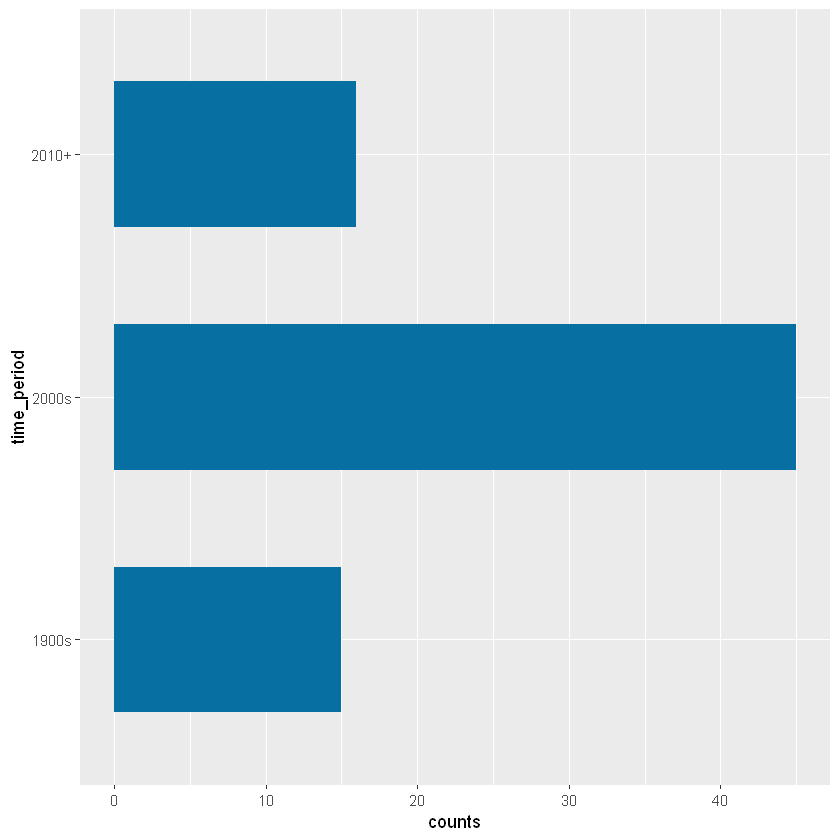

In [32]:
BLUE <- "#076fa2"

plot <- ggplot(reshaped) + geom_col(aes(counts, time_period), fill = BLUE, width = 0.6)

plot

Obviously this is a fugly plot and I would not leave it at this, but for the purposes of the exercise it matches my matplotlib plot well enough.